# RUNGE KUTTA

In [ ]:
import scipy as sc
import numpy as np
import sympy as sy
import matplotlib.pylab as plt
import pylab as py
from scipy.optimize import fsolve
%matplotlib inline

Una forma de construir esquemas numéricos es mediante la aproximación de la integral:

\begin{equation}
    y(t_{j+1})=y(t_{j})+\int_{t_j}^{t_{j+1}}f(s,y(s))ds
\end{equation}

Para el caso del método de RK la aproximación de la integral se lleva a cabo mediante un tipo de regla de cuadrados:


\begin{equation}
   \int_{t_j}^{t_{j+1}}f(s,y(s))ds \approx h\sum_{l=1}^{m}\gamma_l k_l
\end{equation}

Donde $h=\frac{T-t_0}{n}$, $t_{j+1}=t_j + h$, $y_{j+1}=y_j + hf(t_j,y_j)$

ara ciertos pesos $\gamma_l$ con evaluaciones $k_l=f(s_l , y_l)$ de f, para 
$l = 1, . . . , m$, el método Runge Kutta viene dado por:

\begin{equation}
   y(t_{j+1})=y(t_{j})+ h\sum_{l=1}^{m}\gamma_l k_l
\end{equation}

Donde:

\begin{equation}
    k_l= f\left(t_j+\alpha_l h, y(t_j)+h\sum_{}^{}\beta_{j,l} k_l \right)
\end{equation}

Para el Método Clásico RK de 4 etapas se tiene:

\begin{eqnarray*}
    h&=&\frac{T-t_0}{n}\\
    t_{j+1}&=&t_j+h\\
    k_1&=&f(t_j, y_j)\\
    k_2&=&f\left( t_j+\frac{h}{2}, y_j+\frac{h}{2}k_1\right)\\
    k_3&=&f\left( t_j+\frac{h}{2}, y_j+\frac{h}{2}k_2\right)\\
    k_4&=&f\left( t_j+h, y_j+hk_3\right)\\
    y_{j+1}&=& y_j + \frac{h}{6}(k_1+2k_2+2k_3+k_4)
\end{eqnarray*}

In [13]:
#Definimos la función que queremos resolver

def testfunc(t,y):
    return -y+5*np.cos(5*t)*np.exp(-t)
def solexacta(t):
    return np.exp(-t)+np.sin(5*t)*np.exp(-t)

#Definimos los valores inciales y parámetros

T=4.0
t0=0.0
n=100
y0=1.0

#Definimos el la función RK

def rk4(testfunc,T,t0,n):
    t=np.zeros(n)
    y=np.zeros(n)
    y[0]=y0
    t[0]=t0
    h=(T-t0)/n
    for i in range(0,n-1):
        t[i+1]=t0+i*h
        k1=testfunc(t[i],y[i])
        k2=testfunc(t[i]+h/2,y[i]+(h/2)*k1)
        k3=testfunc(t[i]+h/2,y[i]+(h/2)*k2)
        k4=testfunc(t[i]+h,y[i]+h*k3)
        y[i+1]=y[i]+(h/6)*(k1+2*k2+2*k3+k4)
    return t,y
        

In [14]:
t1,y1=rk4(testfunc,T,t0,n)
dt=(T-t0)/n
TT=np.arange(t0,T,dt)
Y=solexacta(TT)

n2=150
n3=200
n4=500

t2,y2=rk4(testfunc,T,t0,n2)
t3,y3=rk4(testfunc,T,t0,n3)
t4,y4=rk4(testfunc,T,t0,n4)

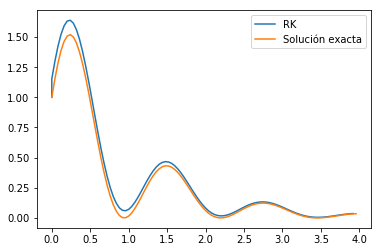

In [15]:
plt.plot(t1,y1,label="RK")
plt.plot(TT,Y,label="Solución exacta")
plt.legend()

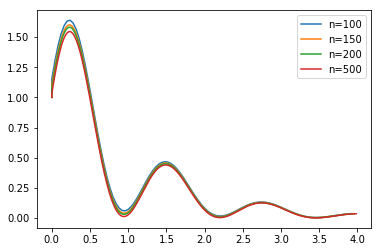

In [16]:
plt.plot(t1,y1,label="n=100")
plt.plot(t2,y2,label="n=150")
plt.plot(t3,y3,label="n=200")
plt.plot(t4,y4,label="n=500")
plt.legend()